<a href="https://colab.research.google.com/github/rakshithaelango/IMDB_Rating_prediction/blob/main/IMDB_Rating_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMDB Rating Prediction**





**Problem Statement:**


Every year, thousands of movies are produced in the film industry. It is a multi-billion dollar industry where a tremendous amount of investment and funding is involved with each project yet so few of them achieve the commercial success. These datasets are accessible through major platforms such as Internet Movie Database (IMDB), Rotten Tomatoes, and Metacritic and contain details about the movie, ranging from the budget of a movie to the number of likes of the director. The analysis of such datasets would prove which factors are more important than others and how these factors influence the ratings of the movies. The findings of this study may be useful to the stakeholders whose decisions can greatly influence how their movie will turn out.

## **Importing libraries**

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

## **Loading Dataset**

In [ ]:
# loading DataSet
df = pd.read_csv('/content/movie_metadata.csv')

## **Exploring DataSet**

In [ ]:
# first 5 fetching 
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
# last 5 fetching
df.tail()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [ ]:
# collecting no rows and columns
df.shape

(5043, 28)

In [ ]:
# collecting columns names 
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [ ]:
# overall information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

## **Data Cleaning**

In [ ]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [ ]:
# finding missing values 
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [ ]:
df['color'].unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [ ]:
df.color.replace(to_replace=['Color', ' Black and White'], value=[0, 1], inplace=True)

In [ ]:
df['color'] = df['color'].astype(float)

In [ ]:
df = df.select_dtypes(include=['float64', 'int64', 'int'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   float64
 1   num_critic_for_reviews     4993 non-null   float64
 2   duration                   5028 non-null   float64
 3   director_facebook_likes    4939 non-null   float64
 4   actor_3_facebook_likes     5020 non-null   float64
 5   actor_1_facebook_likes     5036 non-null   float64
 6   gross                      4159 non-null   float64
 7   num_voted_users            5043 non-null   int64  
 8   cast_total_facebook_likes  5043 non-null   int64  
 9   facenumber_in_poster       5030 non-null   float64
 10  num_user_for_reviews       5022 non-null   float64
 11  budget                     4551 non-null   float64
 12  title_year                 4935 non-null   float64
 13  actor_2_facebook_likes     5030 non-null   float

In [ ]:
# dropping null values
df = df.dropna().astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3800 entries, 0 to 5042
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3800 non-null   float64
 1   num_critic_for_reviews     3800 non-null   float64
 2   duration                   3800 non-null   float64
 3   director_facebook_likes    3800 non-null   float64
 4   actor_3_facebook_likes     3800 non-null   float64
 5   actor_1_facebook_likes     3800 non-null   float64
 6   gross                      3800 non-null   float64
 7   num_voted_users            3800 non-null   float64
 8   cast_total_facebook_likes  3800 non-null   float64
 9   facenumber_in_poster       3800 non-null   float64
 10  num_user_for_reviews       3800 non-null   float64
 11  budget                     3800 non-null   float64
 12  title_year                 3800 non-null   float64
 13  actor_2_facebook_likes     3800 non-null   float

## **Exploratory Data Analysis**

Text(0.5, 0, 'IMDB Ratings')

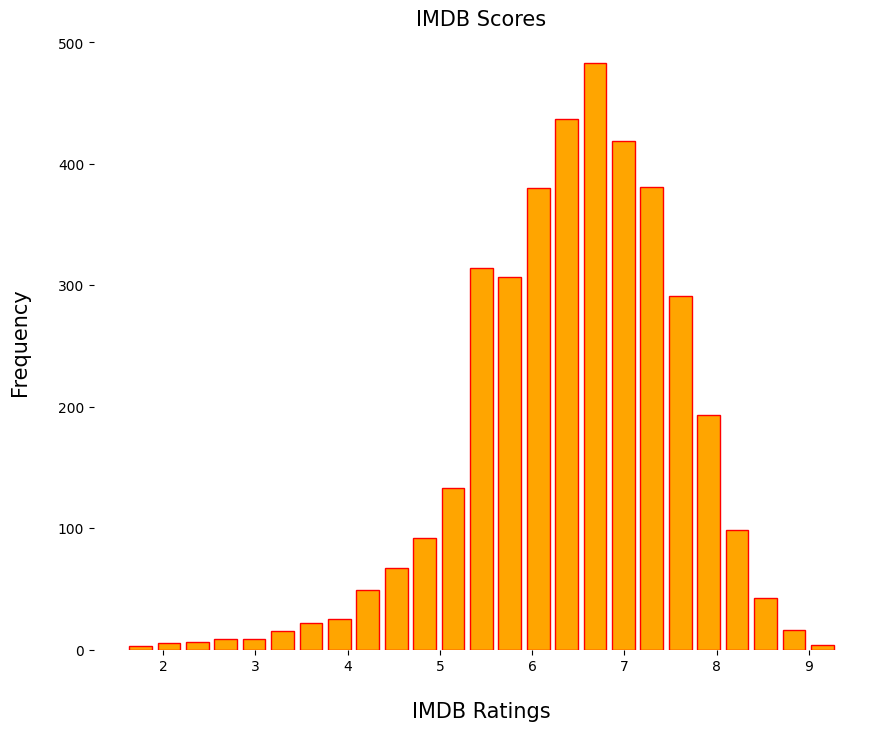

In [ ]:
histplot = df.hist(column='imdb_score', bins=25, grid=False, figsize=(10,8), color='orange', edgecolor='red',
                   zorder=2, rwidth=0.8)
sns.despine(left=True, bottom=True)
plt.title('IMDB Scores', size=15)
plt.ylabel('Frequency', size=15, labelpad=20)
plt.xlabel('IMDB Ratings', size=15, labelpad=20)

The ratings fall between 6 and 7.5.

Text(0.5, 0, 'IMDB Ratings')

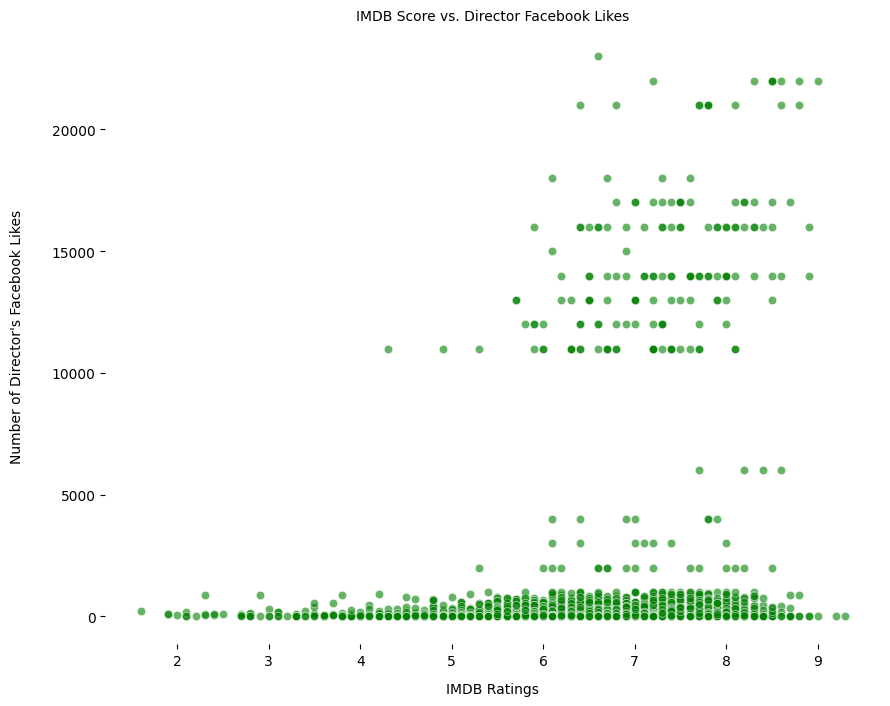

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='imdb_score', y='director_facebook_likes', data=df, alpha=0.6, c= 'green')
sns.despine(left=True, bottom=True)
plt.title("IMDB Score vs. Director Facebook Likes", size=10)
plt.ylabel("Number of Director's Facebook Likes", size=10, labelpad=20)
plt.xlabel("IMDB Ratings", size=10, labelpad=10)

This indicates the IMDB score can be biased and influenced by the popularity of the director

Text(0.5, 0, 'IMDB Ratings')

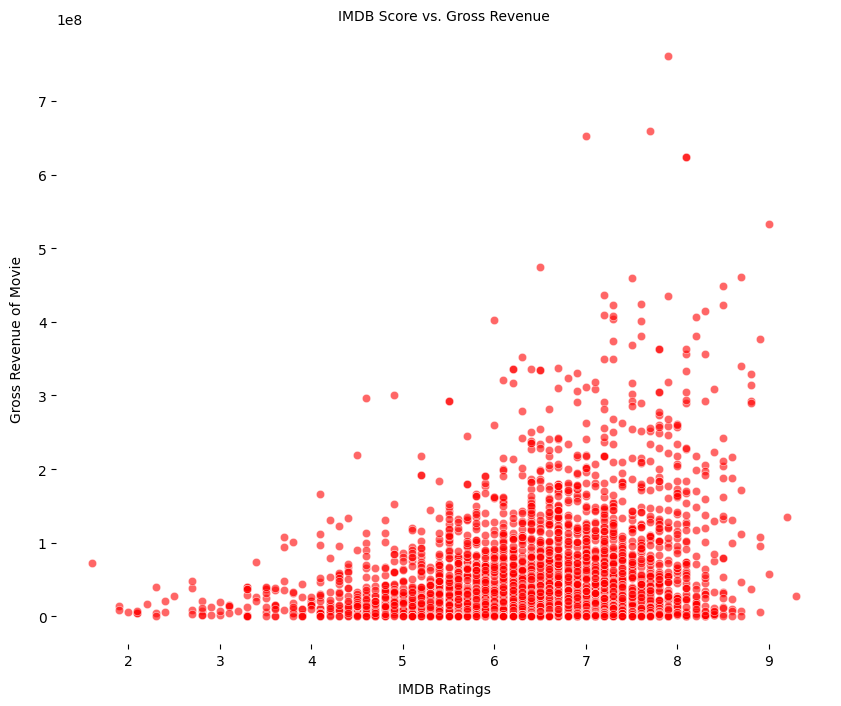

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='imdb_score', y='gross', data=df, alpha=0.6, c= 'red')
sns.despine(left=True, bottom=True)
plt.title('IMDB Score vs. Gross Revenue', size=10)
plt.ylabel('Gross Revenue of Movie ', size=10, labelpad=10)
plt.xlabel('IMDB Ratings', size=10, labelpad=10)

The higher the ratings of the moive. Not all blockbusters are rated highly for the artistic merit of the movie.

Text(0.5, 0, 'Year')

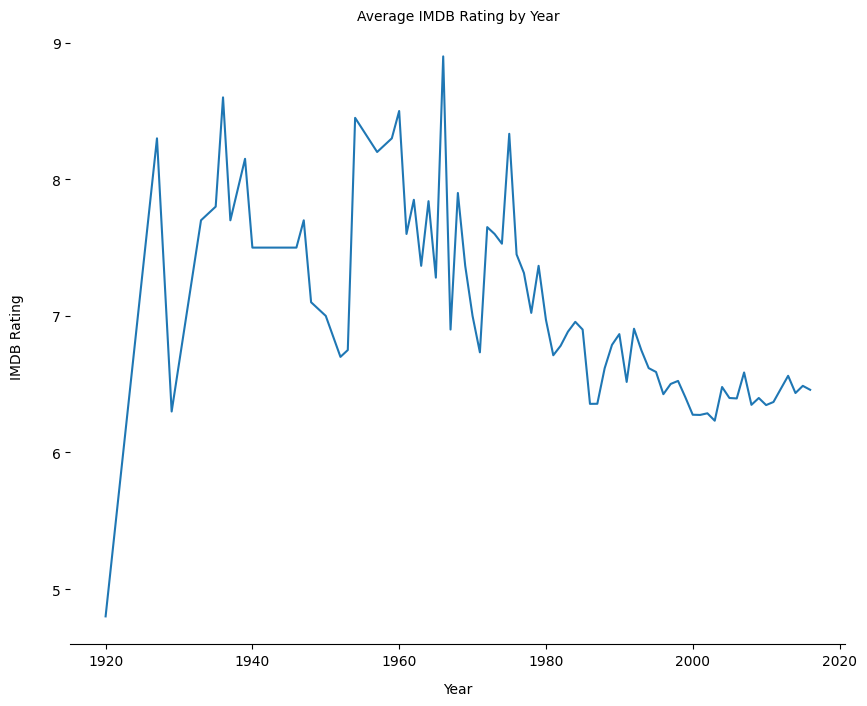

In [ ]:
plt.figure(figsize=(10,8))
avg_score = df.groupby('title_year')['imdb_score'].agg('mean')
avg_score.plot()
sns.despine(left=True)
plt.title('Average IMDB Rating by Year', size=10)
plt.ylabel('IMDB Rating', size=10, labelpad=20)
plt.xlabel('Year', size=10, labelpad=10)

The movie ratings are generally higher in the early years (1920-1970).

<Axes: >

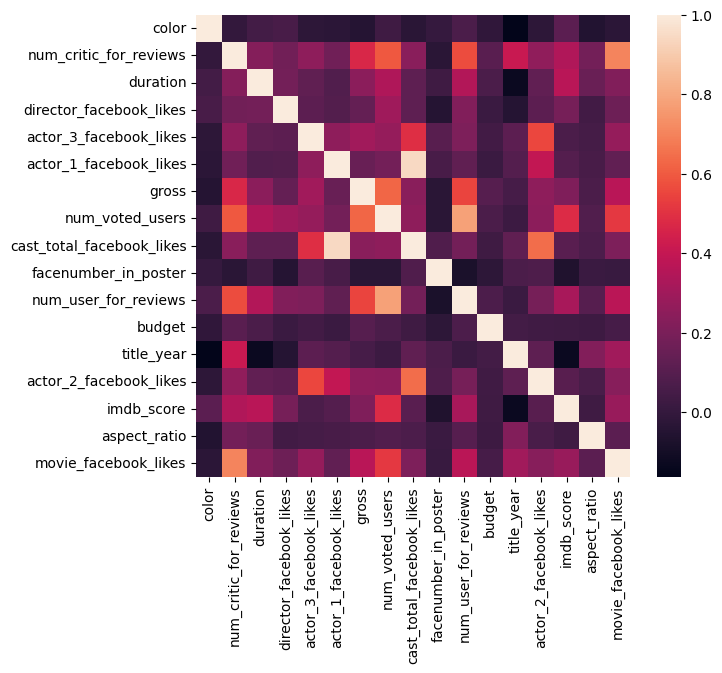

In [ ]:
# heatmap to see factors are correlated
plt.figure(figsize=(7,6))
correlation = df.corr()
sns.heatmap(correlation)

In [ ]:
corr_matrix = df.corr()
corr_matrix['imdb_score'].sort_values(ascending=False)

imdb_score                   1.000000
num_voted_users              0.477892
duration                     0.366108
num_critic_for_reviews       0.343841
num_user_for_reviews         0.322483
movie_facebook_likes         0.279450
gross                        0.212076
director_facebook_likes      0.190821
color                        0.113998
cast_total_facebook_likes    0.106221
actor_2_facebook_likes       0.102035
actor_1_facebook_likes       0.093096
actor_3_facebook_likes       0.064960
budget                       0.029025
aspect_ratio                 0.028518
facenumber_in_poster        -0.064359
title_year                  -0.129205
Name: imdb_score, dtype: float64

## **Feature Selection**

In [ ]:
#  Removing certain features 
df.drop(['aspect_ratio', 'facenumber_in_poster'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3800 entries, 0 to 5042
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3800 non-null   float64
 1   num_critic_for_reviews     3800 non-null   float64
 2   duration                   3800 non-null   float64
 3   director_facebook_likes    3800 non-null   float64
 4   actor_3_facebook_likes     3800 non-null   float64
 5   actor_1_facebook_likes     3800 non-null   float64
 6   gross                      3800 non-null   float64
 7   num_voted_users            3800 non-null   float64
 8   cast_total_facebook_likes  3800 non-null   float64
 9   num_user_for_reviews       3800 non-null   float64
 10  budget                     3800 non-null   float64
 11  title_year                 3800 non-null   float64
 12  actor_2_facebook_likes     3800 non-null   float64
 13  imdb_score                 3800 non-null   float

In [ ]:
# Into 2 components: X and y
X = df.drop('imdb_score', axis=1).values
y = df['imdb_score'].values

## **Splitting into train and test**

In [ ]:
# Splitting the dataset into train / test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Model Building**

**1. Linear Regression**

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
linreg.score(X_test, y_test)

0.22920676184692867

**2. Random Forest Regression**

In [ ]:
randomforest = RandomForestRegressor(n_estimators=100, random_state=0)
randomforest.fit(X_train, y_train)
randomforest.score(X_test, y_test)

0.5630884461372567

**3. Decision Tree Regression**

In [ ]:
decisiontree = DecisionTreeRegressor(max_depth=5, random_state=0)
decisiontree.fit(X_train, y_train)
decisiontree.score(X_test, y_test)

0.36204154088068385

## **Conclusion:**

----> Random forest performed good score.